<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/Lab4_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import  GridSearchCV

In [ ]:
df = pd.read_csv('/content/smoking.csv')
df.head(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [ ]:
# drop columns
df = df.drop(columns=['ID'])

In [ ]:
# Select relevant columns
columns_to_keep = ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
                   'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
                   'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp',
                   'oral', 'dental caries', 'tartar', 'smoking']
df = df[columns_to_keep]

In [ ]:
# Handle categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['oral'] = le.fit_transform(df['oral'])
df['tartar'] = le.fit_transform(df['tartar'])

In [ ]:
X = df.drop(columns=['smoking'])
y = df['smoking']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 73.43%
Confusion Matrix:
[[5225 1802]
 [1158 2954]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      7027
           1       0.62      0.72      0.67      4112

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.75      0.73      0.74     11139



In [ ]:
# Initialize the XGBoost model
model = XGBClassifier()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 76.00%
Confusion Matrix:
[[5568 1459]
 [1214 2898]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7027
           1       0.67      0.70      0.68      4112

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.75     11139
weighted avg       0.76      0.76      0.76     11139



In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 82.90%
Confusion Matrix:
[[5974 1053]
 [ 852 3260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



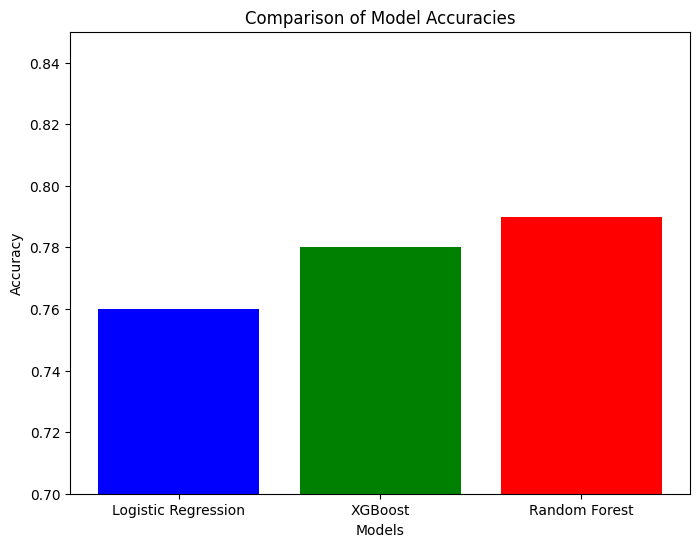

In [ ]:
logistic_regression_accuracy = 0.76
xgboost_accuracy = 0.78
random_forest_accuracy = 0.79


models = ['Logistic Regression', 'XGBoost', 'Random Forest']
accuracies = [logistic_regression_accuracy, xgboost_accuracy, random_forest_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.7, 0.85])  # Adjust y-axis limits as needed
plt.show()

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Accuracy for Logistic Regression (Tuned): 73.43%
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Accuracy for XGBoost (Tuned): 79.47%
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy for Random Forest (Tuned): 82.86%


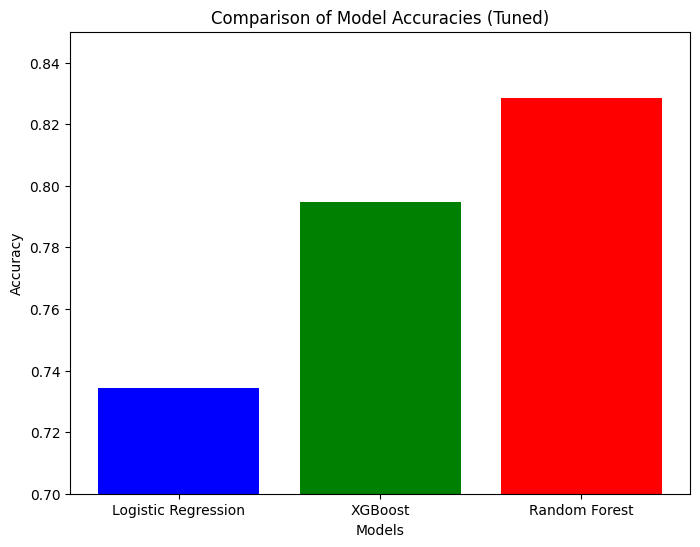

In [ ]:
# Hyperparameter tuning
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=5)
grid_lr.fit(X_train_scaled, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
best_lr_model = grid_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy for Logistic Regression (Tuned): {accuracy_lr * 100:.2f}%")

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
grid_xgb.fit(X_train_scaled, y_train)
print("Best parameters for XGBoost:", grid_xgb.best_params_)
best_xgb_model = grid_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy for XGBoost (Tuned): {accuracy_xgb * 100:.2f}%")

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest (Tuned): {accuracy_rf * 100:.2f}%")


# Update the accuracies with the tuned model results
logistic_regression_accuracy = accuracy_lr
xgboost_accuracy = accuracy_xgb
random_forest_accuracy = accuracy_rf

models = ['Logistic Regression', 'XGBoost', 'Random Forest']
accuracies = [logistic_regression_accuracy, xgboost_accuracy, random_forest_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Tuned)')
plt.ylim([0.7, 0.85])
plt.show()

Logistic Regression struggles with the complexity of the dataset, and hyperparameter tuning had no effect on its performance. This could be due to the model's linear nature, which might not capture non-linear relationships in the data.

XGBoost shows a noticeable improvement after tuning, indicating that it benefits from adjusting its hyperparameters. Its ability to capture non-linear patterns helps it perform better than logistic regression, but there is still room for improvement in reducing false negatives.

Random Forest outperforms both logistic regression and XGBoost with the highest accuracy. It balances both classes effectively and has a strong performance even without much tuning. This suggests that Random Forest is well-suited for this binary classification task, as it handles overfitting and variance well.

# Which hyperparameters had the most significant impact on model performance, and why?

Logistic
*   In logistic regression, the C parameter controls the regularization strength (inversely proportional). A lower C encourages stronger regularization, which helps prevent overfitting, while a higher C makes the model more flexible. In your case, tuning C to 1 didn't improve the model’s performance, indicating that regularization had minimal effect, perhaps because the dataset complexity is beyond the capacity of a simple linear model.

XGBoost

*   learning_rate: Controls the size of steps taken in the optimization process. A smaller value requires more trees but can lead to better generalization. After tuning, it was set to 0.2, which improved performance by allowing the model to take moderately sized steps in finding the optimal solution.
* max_depth: Limits the depth of individual trees. A deeper tree can capture more complexity but may overfit. Setting this to 7 balances the depth to prevent overfitting while allowing enough complexity.

* n_estimators: This defines the number of boosting rounds or trees in the model. More trees generally increase performance but can also lead to overfitting. After tuning, setting this to 300 provided sufficient learning capacity without overfitting.

Random Forest
* max_depth: Similar to XGBoost, max_depth limits the depth of each tree. Leaving this at None allows the trees to grow fully, which may have captured more of the dataset's complexity, leading to better performance.
* min_samples_split: This parameter controls the minimum number of samples required to split a node. A lower value (like 2, which you used) allows more splits and deeper trees, enhancing the model's ability to learn finer details.
* n_estimators: The number of trees in the forest. Increasing this to 300 helped improve performance by stabilizing the predictions through averaging across more trees.

# Why these hyperparameters matter:

In ensemble methods like XGBoost and Random Forest, hyperparameters such as n_estimators, max_depth, and learning_rate determine the balance between underfitting and overfitting. They directly control the model's complexity and ability to generalize across unseen data.
In simpler models like Logistic Regression, C is important for controlling overfitting, but it might not be sufficient to capture complex patterns.

# How do evaluation metrics like Precision, Recall, and F1-Score provide more insight than Accuracy in certain classification tasks (e.g., imbalanced datasets)?

For imbalanced datasets (where one class significantly outnumbers the other), accuracy can be high just by predicting the majority class. However, Precision and Recall give deeper insight into how well the model is performing with respect to the minority class, where misclassification might be more critical.
Example: If you're predicting smokers in a medical dataset where smokers are rare, high accuracy could simply mean the model is predicting "non-smoker" for almost everyone, which wouldn't help in identifying actual smokers. In this case, Recall would highlight that the model misses many smokers, while Precision would show how often non-smokers are falsely identified as smokers.

# If your model had poor performance, what steps would you take to improve it?

* Data Preprocessing
* Class Balancing (for imbalanced data)
* Model Tuning
* Algorithm Selection
* Regularization



